# Problem Statement

To predict sepallength values by considering other variables as an independent variables.
Independent Variable
1. sepalwidth
2. petallength
3. petalwidth
4. Species

Dependent variable:
    Sepal length

In [44]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [30]:
df=pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [32]:
df.columns    # return the column labels

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [33]:
df.axes     # return the axes labels of the dataframe 

[RangeIndex(start=0, stop=150, step=1),
 Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
        'Species'],
       dtype='object')]

In [34]:
df.shape   # gives no. of rows & columns

(150, 6)

# EDA  (Data Visualization)

In [35]:
df.head()     # gives first 5 values from df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [36]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [37]:
df['Species'].value_counts().to_dict()  # into dictionary format

{'Iris-setosa': 50, 'Iris-versicolor': 50, 'Iris-virginica': 50}

# Feature Engineering

In [38]:
# performing one hot encoding...i.e converting textual data into numerical format

In [39]:
df.replace({'Iris-setosa':0,'Iris-versicolor': 1, 'Iris-virginica': 2},inplace=True)
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


# Feature Selection

In [40]:
df.drop('Id',axis=1,inplace=True)  # inplace=True -->we dont have to create any extra variable and can save changes in same

In [42]:
df.corr() # corr=coefficient of correlation

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


<Axes: >

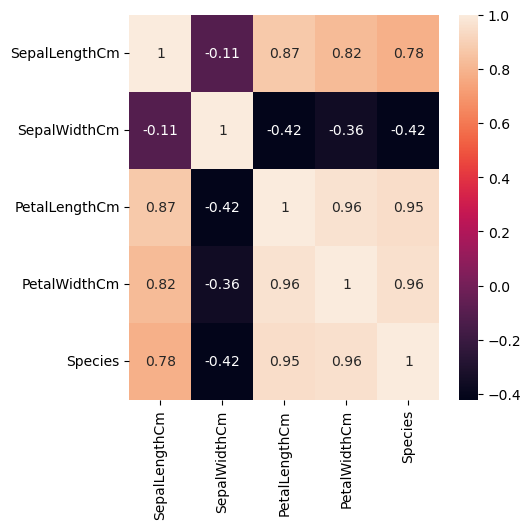

In [45]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(),annot=True)

C:\Users\Shraddha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


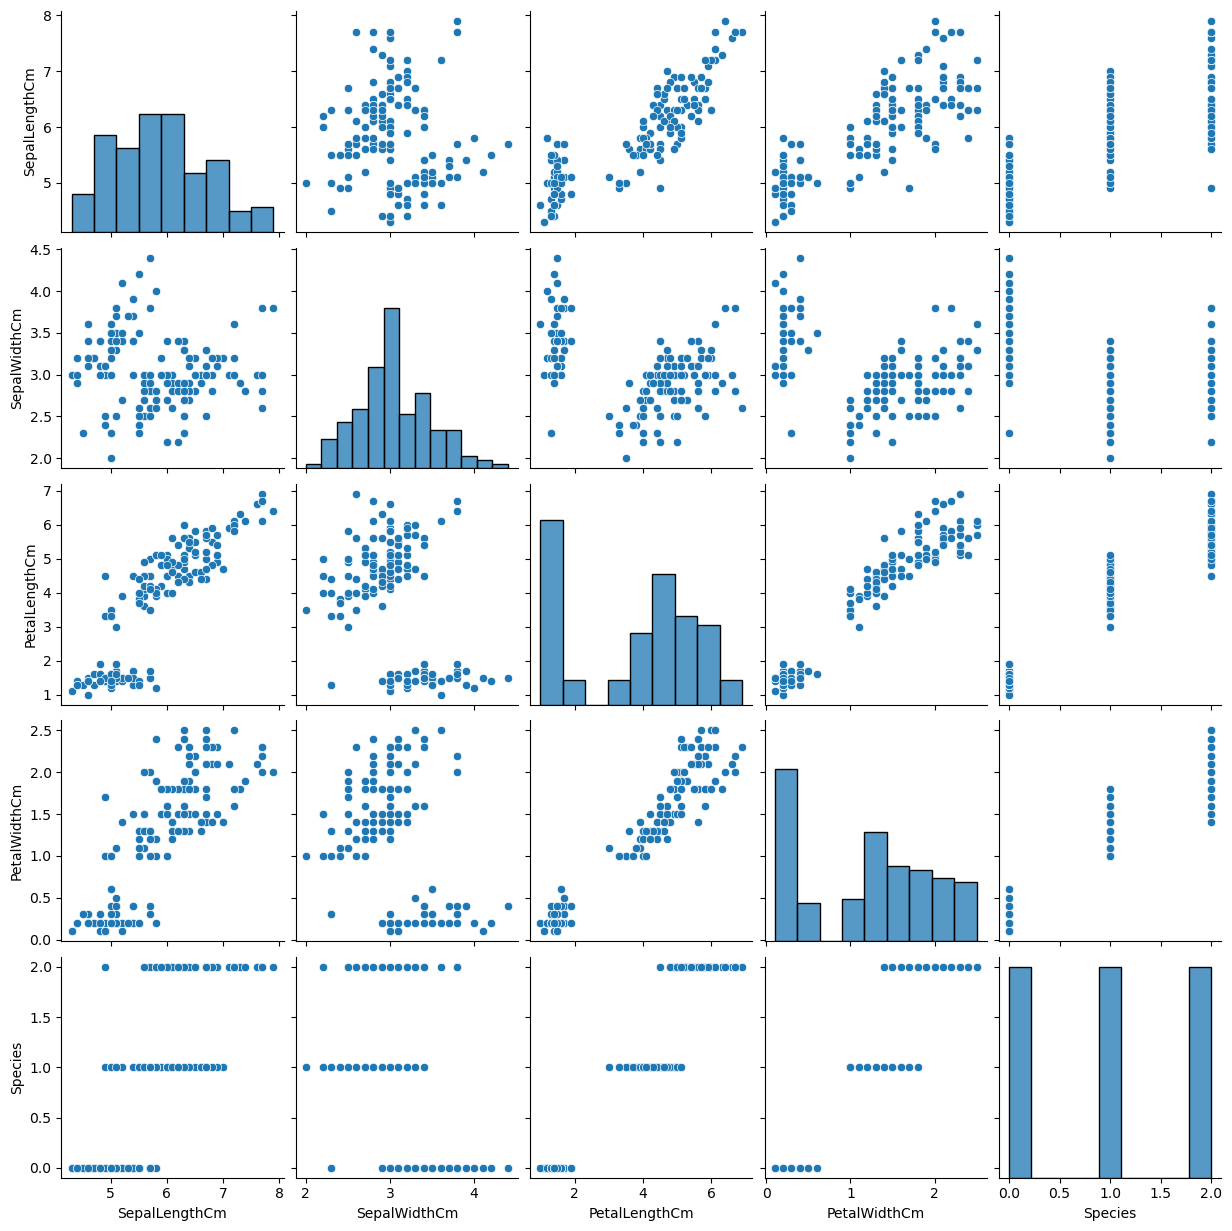

In [46]:
sns.pairplot(df)

VIF >> 1 to infinity >>> any +ve value.

VIF 1 >> no correlation
VIF 1-5 >> moderately independent
VIF 1-10 >> there is a dependency

In [47]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [49]:
vif=pd.DataFrame() # creating empty df

In [53]:
df1=df.drop('SepalLengthCm',axis=1)   # as per problem statement...# creating x andd y vars
df1.head()                                 

,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,3.5,1.4,0.2,0
1,3.0,1.4,0.2,0
2,3.2,1.3,0.2,0
3,3.1,1.5,0.2,0
4,3.6,1.4,0.2,0


In [55]:
vif['Var']=df1.columns  #adding columns into created dataframe
vif

,Var
0,SepalWidthCm
1,PetalLengthCm
2,PetalWidthCm
3,Species


In [58]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [59]:
vif['VIF']=[variance_inflation_factor(df1.values,i) for i in range(4)]
vif

,Var,VIF
0,SepalWidthCm,8.718375
1,PetalLengthCm,69.658172
2,PetalWidthCm,62.150129
3,Species,35.057423


In [60]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Model Training

In [65]:
x=df.drop('SepalLengthCm',axis=1) #independent var
y=df['SepalLengthCm']  #dependent var

In [66]:
x

,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,3.5,1.4,0.2,0
1,3.0,1.4,0.2,0
2,3.2,1.3,0.2,0
3,3.1,1.5,0.2,0
4,3.6,1.4,0.2,0
...,...,...,...,...
145,3.0,5.2,2.3,2
146,2.5,5.0,1.9,2
147,3.0,5.2,2.0,2
148,3.4,5.4,2.3,2


In [67]:
y

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: SepalLengthCm, Length: 150, dtype: float64

In [68]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [69]:
x_test

,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
14,4.0,1.2,0.2,0
98,2.5,3.0,1.1,1
75,3.0,4.4,1.4,1
16,3.9,1.3,0.4,0
131,3.8,6.4,2.0,2
56,3.3,4.7,1.6,1
141,3.1,5.1,2.3,2
44,3.8,1.9,0.4,0
29,3.2,1.6,0.2,0
120,3.2,5.7,2.3,2


In [71]:
x_test.shape

(45, 4)

In [75]:
x_train

,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
118,2.6,6.9,2.3,2
18,3.8,1.7,0.3,0
4,3.6,1.4,0.2,0
45,3.0,1.4,0.3,0
59,2.7,3.9,1.4,1
...,...,...,...,...
133,2.8,5.1,1.5,2
137,3.1,5.5,1.8,2
72,2.5,4.9,1.5,1
140,3.1,5.6,2.4,2


In [76]:
y_train

118    7.7
18     5.7
4      5.0
45     4.8
59     5.2
      ... 
133    6.3
137    6.4
72     6.3
140    6.7
37     4.9
Name: SepalLengthCm, Length: 105, dtype: float64

In [78]:
lr=LinearRegression()

In [79]:
lr.fit(x_train,y_train)

LinearRegression()

In [80]:
lr.coef_

array([ 0.56369871,  0.84580755, -0.49750138, -0.38257383])

In [81]:
lr.intercept_

1.9056063342325853

In [82]:
y_pred=lr.predict(x_test)

In [83]:
y_pred[:5]

array([5.07586994, 4.92245041, 6.23917992, 5.00458055, 7.70067934])

In [84]:
y_test[:5]

14     5.8
98     5.1
75     6.6
16     5.4
131    7.9
Name: SepalLengthCm, dtype: float64

# Evaluation of Testing Data

In [86]:
from sklearn.metrics import r2_score 

In [88]:
r_sq=r2_score(y_test,y_pred)
r_sq

0.7756475306964495

In [89]:
ad_r2=1-((1-r_sq)*len(x_test)-1)/(len(x_test)-len(x.columns)-1)
ad_r2

0.7726034720335058

In [90]:
y_pred_train=lr.predict(x_train)

In [91]:
r_sq=r2_score(y_train,y_pred_train)
r_sq

0.8860053136549519

In [92]:
ad_r2=1-((1-r_sq)*len(x_train)-1)/(len(x_train)-len(x.columns)-1)
ad_r2

0.8903055793376995

In [93]:
x_test.head()

,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
14,4.0,1.2,0.2,0
98,2.5,3.0,1.1,1
75,3.0,4.4,1.4,1
16,3.9,1.3,0.4,0
131,3.8,6.4,2.0,2


In [94]:
y_pred

array([5.07586994, 4.92245041, 6.23917992, 5.00458055, 7.70067934,
       6.56253153, 6.05729001, 5.45569521, 4.963234  , 6.62114441,
       5.95065894, 5.34290357, 6.77706646, 6.38675028, 6.21764067,
       4.70949173, 5.7748777 , 6.27401054, 4.89189271, 4.62491098,
       6.11320072, 6.27401054, 6.59741404, 4.82885121, 7.12363737,
       5.92244806, 5.3577712 , 5.16712233, 6.47968273, 5.83349059,
       6.40834144, 6.84672769, 5.68367721, 6.41058445, 5.83843026,
       5.1605026 , 5.55601795, 4.90681223, 6.24585156, 6.55988677,
       6.43874344, 4.91343196, 5.86338152, 6.61620474, 6.4017217 ])

In [98]:
lr.predict([[3.8,6.4,2.0,2]])

C:\Users\Shraddha\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([7.70067934])

## Normality 

In [100]:
residual = y_train - y_pred_train
residual

118    0.402106
18     0.363716
4     -0.019552
45     0.168417
59    -0.447167
         ...   
133    0.013818
137   -0.244364
72    -0.030484
140    0.269556
37     0.027966
Name: SepalLengthCm, Length: 105, dtype: float64

# 1. kdeplot

In [ ]:
Kernel Density Estimate

<Axes: xlabel='SepalLengthCm', ylabel='Density'>

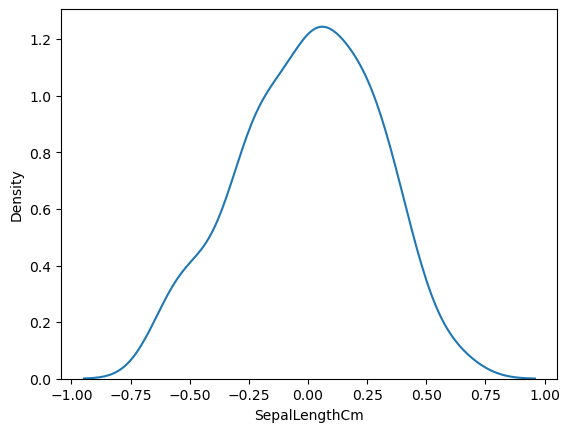

In [101]:
sns.kdeplot(residual)

<Axes: xlabel='SepalWidthCm', ylabel='Density'>

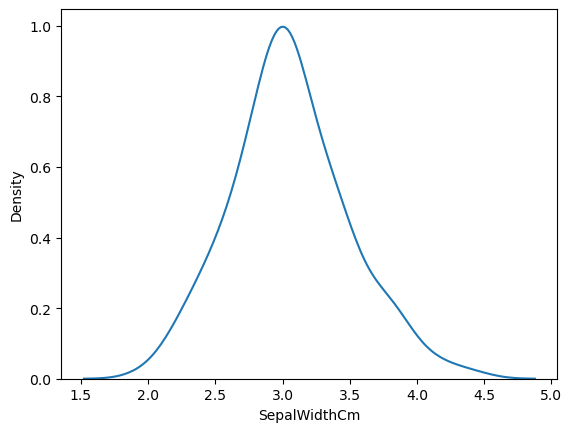

In [102]:
sns.kdeplot(df['SepalWidthCm'])

# 2. Shapiro test

In [103]:
from scipy.stats import shapiro, kstest, normaltest

In [104]:
_,p_val = shapiro(residual)
print('P-value is:', p_val) # p_val = p-value
if p_val > 0.05:
    print('Data is normally distributed')
else :
    print('Data is not normally distributed')

P-value is: 0.1934061199426651
Data is normally distributed


# 3. Q-Q Plot

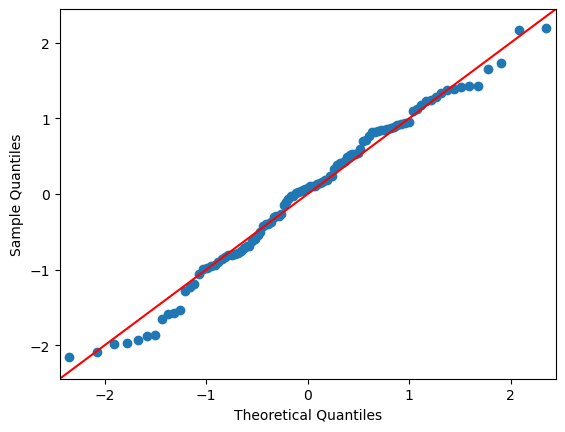

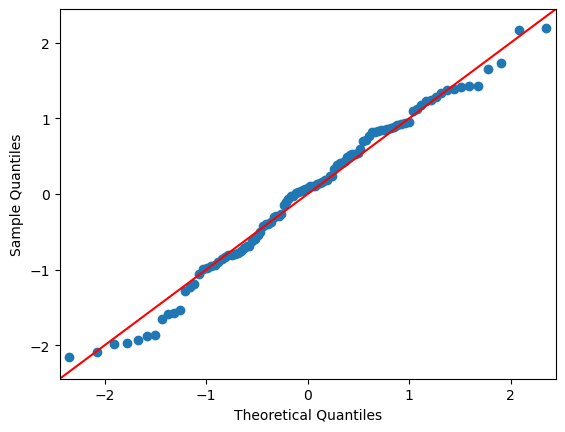

In [107]:
import scipy.stats as sts
import statsmodels.api as sm
sm.qqplot(residual, line ='45',dist = sts.norm, fit= True)